
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [22]:
#No pude usar esta forma porque me daba este error:
   #ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 6

# my_cols = pd.read_csv('../data/heart_disease/columns.csv').column.values.tolist()

# my_data = pd.read_csv('../data/heart_disease/processed.cleveland.data',
#                        delimiter=',',
#                        header=0,
#                        names = my_cols
#                     )

#Pasé todo el dataset a un solo archivo con los nombres de las columnas en la primera fila
#Tuve que eliminar los símbolos ? porque también me daba error en el import. 
my_data = pd.read_csv('./data/heart_disease/dataset.csv')

my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

# Preprocessing

## Missing

In [23]:
my_data.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [24]:
#Se completan los datos faltantes con la media de la característica

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
my_data['ca'] = imp.fit_transform(my_data[['ca']]).ravel()
my_data['thal'] = imp.fit_transform(my_data[['thal']]).ravel()


In [25]:
my_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## One hot encoding

In [26]:
#my_data.describe(include='O')

#No hay datos categóricos en el dataset

## Standardize

In [93]:
x = my_data[[col for col in my_data.columns if col != 'num']]
y = my_data['num']

#La columna num debe entenderse como 0 cuando no hay enfermedad y 1 cuando hay enfermedad. 
#(Los valores 2, 3 y 4 se interpretan como 1)
#Se pasa a binario la columna a predecir
y_binary = y.copy()
y_binary[(y >=2) & (y<=4)] = 1
y = y_binary

#Dejo el nuevo dataset con la ultima columna transformada
my_data_transformed = x.copy()
my_data_transformed['num'] = y
my_data_transformed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [28]:
x.shape

(303, 13)

In [29]:
y.shape

(303,)

## Train test split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.25,
                                             random_state=14,
                                             )

In [31]:
std = StandardScaler()

In [50]:
columnas_todas = [col for col in my_data.columns]
print(columnas_todas)

columnas = [col for col in my_data.columns if ((col != 'num'))]
print(columnas)

xtrain[columnas] = std.fit_transform(xtrain[columnas])
xtest[columnas] = std.transform(xtest[columnas])

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [33]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
79,0.391346,0.653967,0.900353,1.032234,0.467405,-0.426956,1.004494,-1.669491,1.382120,-0.189854,-0.967576,-0.752340,1.115934
189,1.591825,0.653967,-0.142403,0.460031,0.143618,-0.426956,1.004494,-0.116317,-0.723526,0.887567,0.635634,2.456044,1.115934
153,0.063942,0.653967,0.900353,1.604438,0.851901,-0.426956,1.004494,-0.160693,1.382120,-0.189854,0.635634,0.317121,1.115934
181,0.173077,-1.529129,0.900353,0.116709,3.280301,-0.426956,1.004494,0.061189,1.382120,0.797782,0.635634,1.386583,1.115934
148,-1.027403,0.653967,-1.185158,-0.226613,1.236398,-0.426956,1.004494,0.948717,-0.723526,-0.908134,-0.967576,-0.752340,-0.950839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-0.372596,0.653967,0.900353,0.460031,1.054268,-0.426956,-1.013383,1.081846,1.382120,0.528427,-0.967576,-0.752340,1.115934
234,-0.045192,-1.529129,-0.142403,1.604438,-0.928925,-0.426956,-1.013383,0.638082,-0.723526,-0.908134,-0.967576,0.317121,-0.950839
249,0.827884,0.653967,-1.185158,-0.226613,-0.787269,2.342160,1.004494,-0.382575,-0.723526,-0.908134,-0.967576,-0.752340,-0.950839
268,-1.573075,0.653967,0.900353,1.146675,-0.483719,-0.426956,-1.013383,1.436857,-0.723526,-0.908134,-0.967576,-0.752340,1.115934


In [51]:
print(xtrain.shape);
print(ytrain.shape);

print(xtest.shape);
print(ytest.shape);

(227, 13)
(227,)
(76, 13)
(76,)


### PCA (Principal Component Analysis)

In [52]:
RANDOM_STATE = 17

features_cnt = xtrain.shape[1]
porc_varianza = 0.9

pca = PCA(n_components=porc_varianza, random_state=RANDOM_STATE).fit(xtrain)
X_pca = pca.transform(xtrain)
features_pca = X_pca.shape[1]

X_pca.shape

(227, 10)

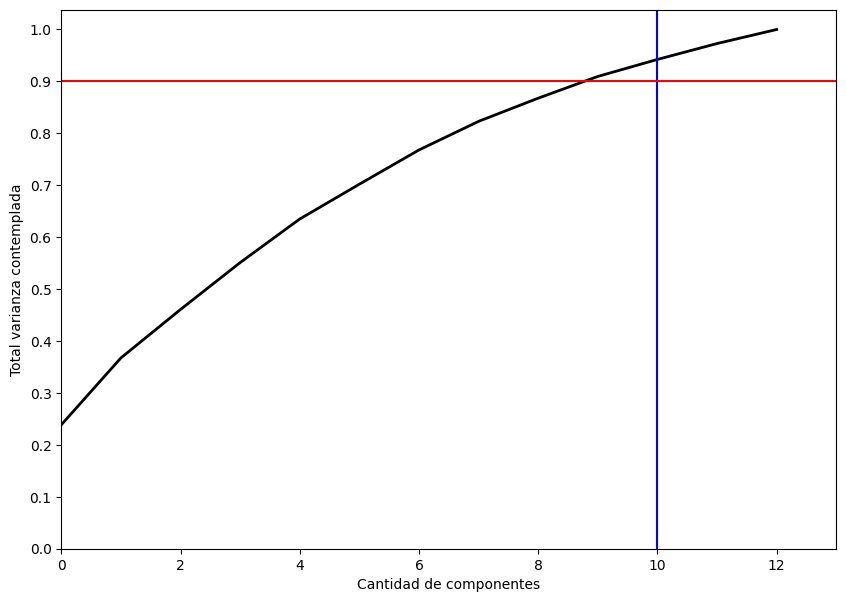

In [53]:
#CURVA DE VARIANZA EXPLICADA
#Graficamos las componentes
pca_2 = PCA(n_components=features_cnt, random_state=RANDOM_STATE).fit(xtrain)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, features_cnt)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(features_pca, c='b') #Marcamos la linea de la cantidad de componentes
plt.axhline(porc_varianza, c='r') #Marcamos la linea del porcentaje de la varianza
plt.show()

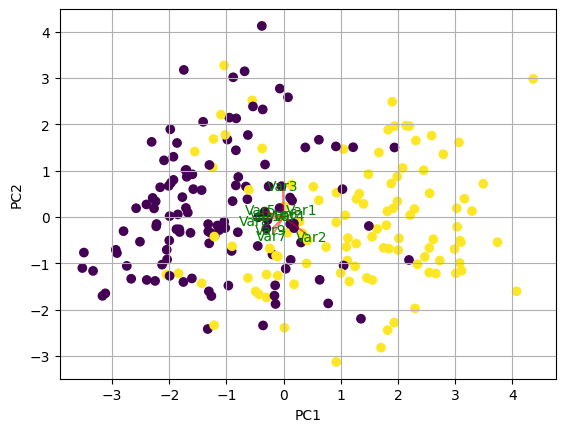

In [37]:
def graficar_pca(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = ytrain) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Llamo a la funcion
graficar_pca(X_pca[:,0:2], pca.components_) 
plt.show()

In [54]:
n_pcs= pca.components_.shape[0]

#Obtengo el índice de la característica más importante por cada componente
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [columnas[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())

#Lista de característica con mas peso en cada componente principal
df

,0,1
0,PC0,oldpeak
1,PC1,age
2,PC2,sex
3,PC3,chol
4,PC4,restecg
5,PC5,restecg
6,PC6,fbs
7,PC7,age
8,PC8,ca
9,PC9,exang


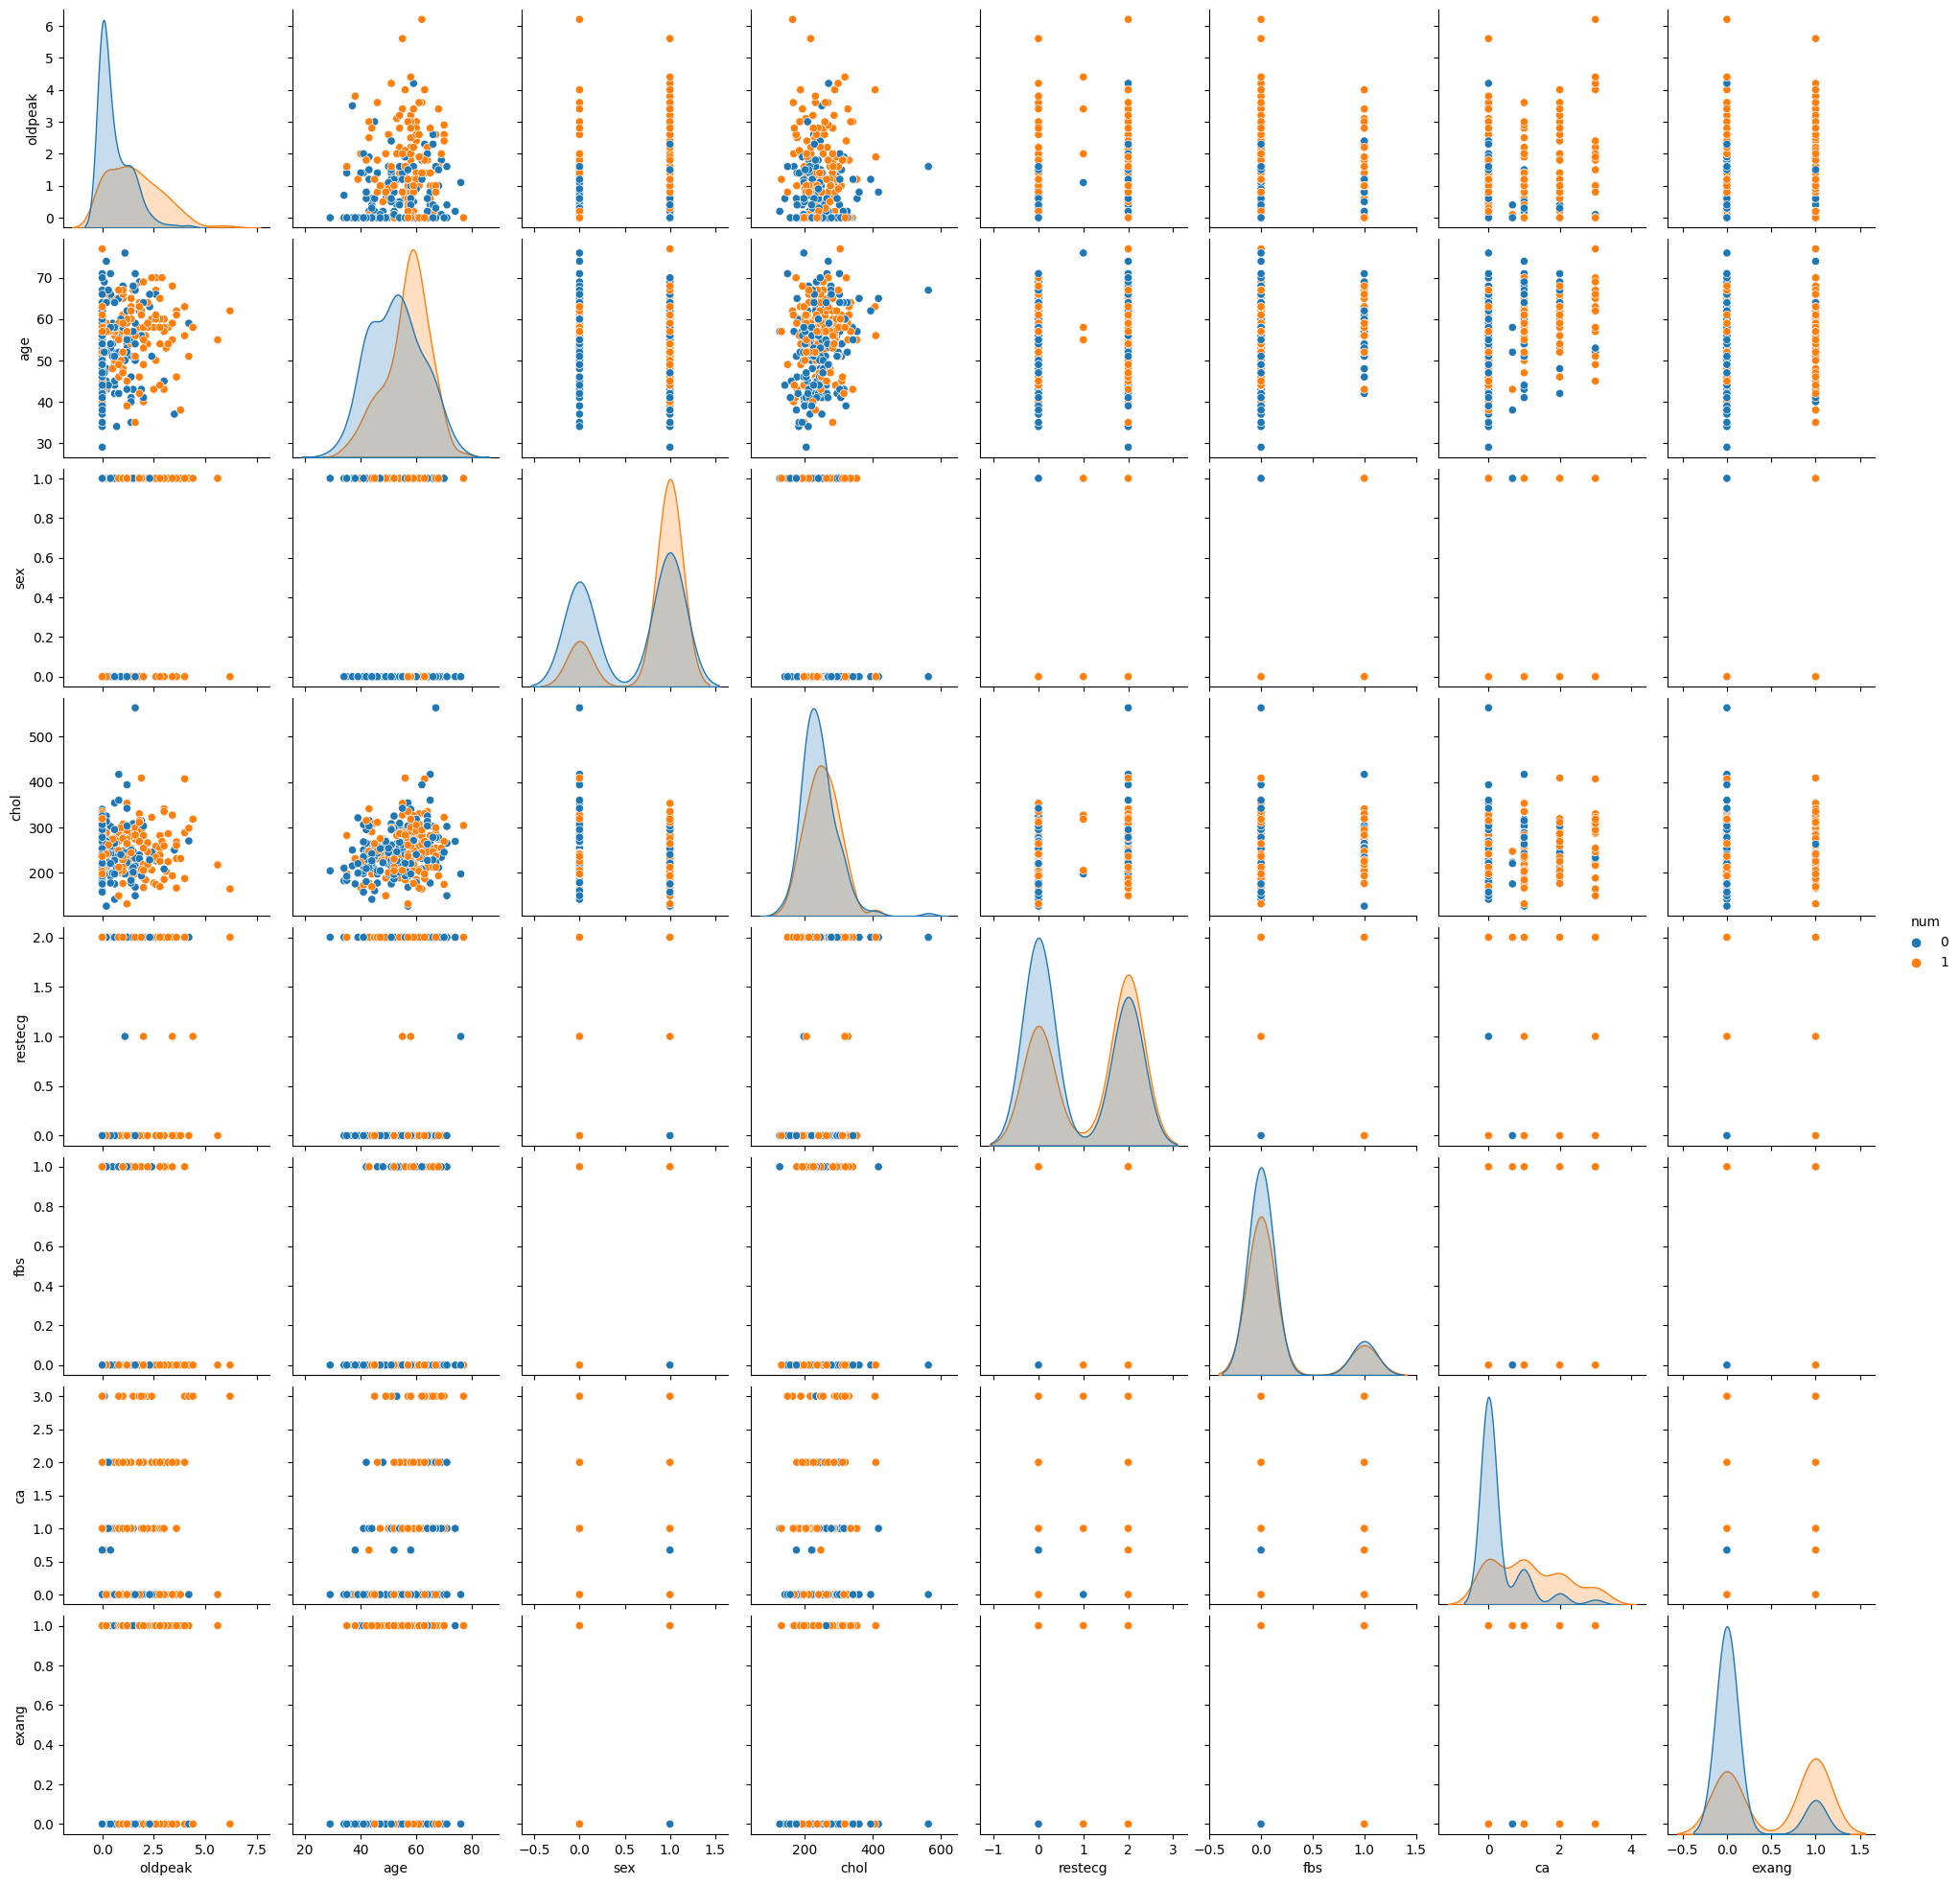

In [94]:
#Columnas de características mas importantes
columnas_reducidas = ['oldpeak', 'age', 'sex', 'chol', 'restecg', 'fbs', 'ca', 'exang']

#Se grafican los datos mas importantes de todo el dataset
datos_importantes = my_data_transformed[columnas_reducidas + ['num']]
sns.pairplot(datos_importantes, hue='num')

In [78]:
#Se arma un dataset solo con las características que tenían mas peso en las componentes principales
set_reducido_train = xtrain[columnas_reducidas]
set_reducido_test = xtest[columnas_reducidas]

#### Según en análisis con PCA, vemos que todas las características del dataset tienen un peso similar, ya que si las ordenamos por su varianza no hay un grupo de pocas características que sumen el 80% o 90% de la varianza. Solo podríamos eliminar tres dimensiones para quedarnos con el 90% y 5 dimensiones para quedarnos con el 80%. De todas formas se reúnen las características que tienen mas peso en cada componente principal y se arma un set de datos reducido en características para hacer una segunda prueba de entrenamiento de los modelos.

## K-means

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_18776\1670628683.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


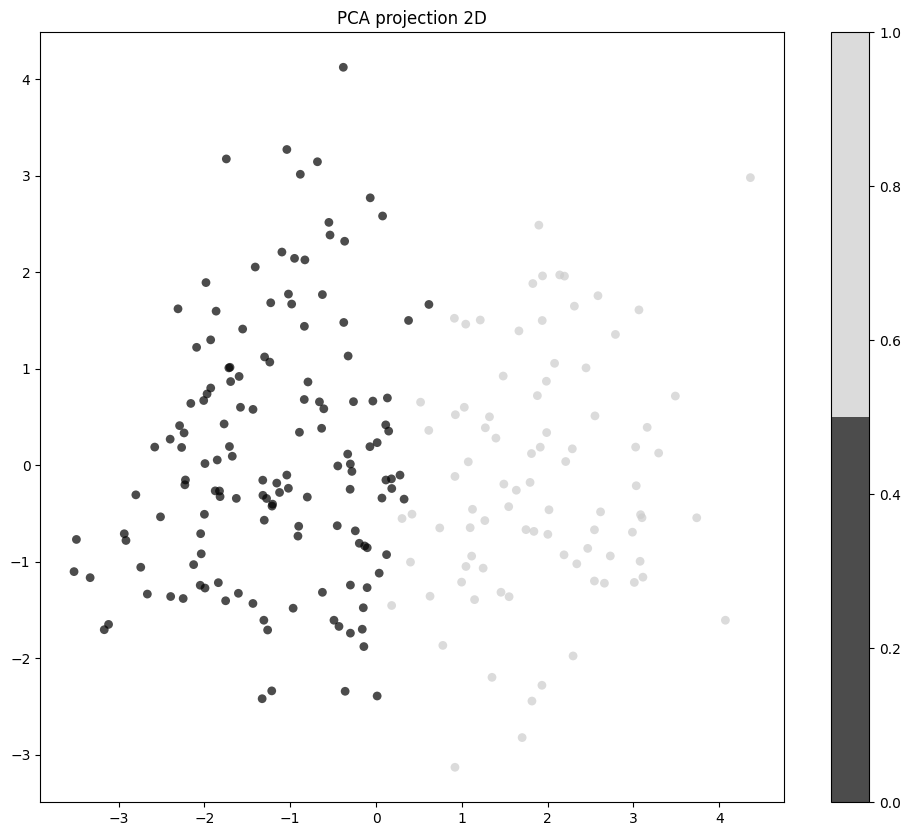

In [41]:
#Probamos la Clusterizacion con k-means
kmeans = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('PCA projection 2D');

#### Aplicando kmeans con k=2 vemos que se puede separar la nube de puntos en dos clases, usando las primeras dos caracteristicas de PCA.

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

## LogisticRegressionCV

In [64]:
logr = LogisticRegressionCV(cv=10, scoring='roc_auc', n_jobs=-1, penalty="l2")
logr.fit(xtrain,ytrain)
logr_y_hat = logr.predict(xtest)

#Versión con set de datos reducido
logr2 = LogisticRegressionCV(cv=10, scoring='roc_auc', n_jobs=-1, penalty="l2")
logr2.fit(set_reducido_train,ytrain)
logr_y_hat2 = logr2.predict(set_reducido_test)

# SGDClassifier

In [65]:
sgd_clf = SGDClassifier(loss='log_loss', random_state=1234, penalty="l2") 
sgd_clf.fit(xtrain, ytrain)
sgd_y_hat = sgd_clf.predict(xtest)

#Versión con set de datos reducido
sgd_clf2 = SGDClassifier(loss='log_loss', random_state=1234, penalty="l2") 
sgd_clf2.fit(set_reducido_train, ytrain)
sgd_y_hat2 = sgd_clf2.predict(set_reducido_test)

# ElasticNetCV

In [75]:
#Si bien el modelo no es el mejor para este tipo de predicciones, 
#se mapean las predicciones de valores reales a un valor discreto 0 o 1.

# Umbral
threshold = 0.5

en = ElasticNetCV(l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99], alphas = np.logspace(-10, 10, 200), cv = 10)
en.fit(xtrain,ytrain)
en_y_hat = en.predict(xtest)
# Convertir a valores binarios
en_y_hat = (en_y_hat >= threshold).astype(int)

#Versión con set de datos reducido
en2 = ElasticNetCV(l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99], alphas = np.logspace(-10, 10, 200), cv = 10)
en2.fit(set_reducido_train,ytrain)
en_y_hat2 = en2.predict(set_reducido_test)
# Convertir a valores binarios
en_y_hat2 = (en_y_hat2 >= threshold).astype(int)

## COMPARACIÓN DE MODELOS USANDO EL SET DE TRAIN COMPLETO

In [72]:
print("-----------------LOGISTIC REGRESSION-----------------")
print(f'Iteraciones para LogisticRegressionCV: {logr.n_iter_.sum()}')
print(classification_report(ytest, logr_y_hat))
print("-----------------SGD CLASIFFIER-----------------")
print(f'Iteraciones para SGDClassifier: {sgd_clf.n_iter_}')
print(classification_report(ytest, sgd_y_hat))
print("-----------------ELASTICNET-----------------")
print(f'Iteraciones para ElasticNetCV con set reducido: {en.n_iter_}')
print(classification_report(ytest, en_y_hat))

-----------------LOGISTIC REGRESSION-----------------
Iteraciones para LogisticRegressionCV: 725
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        43
           1       0.92      0.73      0.81        33

    accuracy                           0.86        76
   macro avg       0.87      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76

-----------------SGD CLASIFFIER-----------------
Iteraciones para SGDClassifier: 49
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.86      0.73      0.79        33

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76

-----------------ELASTICNET-----------------
Iteraciones para ElasticNetCV con set reducido: 12
              precision    recall  f1-score   support

           0  

### Comparativa según el classification_report en base a los entrenamientos con el set de Train COMPLETO

<br>PRECISION (TP / (TP + FP))
<br>Los tres modelos tienen buen rendimiento, pero el que mejor puntuación logró fue el de LogisticRegresssion, con un 82% para la clase 0 y un 92% para la clase 1. El que peor rendimiento tuvo fue el SGDClassifier, que quedo con valores 82-89%, aunque son muy buenos, teniendo en cuenta las pocas iteraciones que realizó el modelo (49). El modelo ElasticNet, si bien no parecia ser el mas adecuado para este problema, tambien logra muy buena puntuación de 80-92%, y realizando solo 12 iteraciones.

<br>RECALL (TP / (TP + FN))
<br>Ocurre algo similar que en PRESICION, LogisticRegression tiene un rendimiento superior, llegando a porcentajes de 95% y 75% para detectar las clases 0 y 1 respectivamente. Mientras que el SGDClassifier y Elasticnet rondan los valores de 70-95%, que son muy buenos de todas formas.

<br>F1-SCORE (Medida de equilibrio entre PRESICION y RECALL =  2 * (precision * recall) / (precision + recall)
<br>El modelo LogisticRegresssion vuelve a tener mejor rendimiento de los tres, con puntuaciones de 81-88%, Mientras Elasticnet y SGDClassifier lo siguen levemente por debajo con resultados de 79-87% y 80-87% respectivamente.

<br>ACCURACY ((TP + TN) / (TP + TN + FP + FN))
<br>El modelo de LogisticRegression logra el mejor resultado con un valor de 86%, pero los otros dos modelos quedan levemente por debajo con 84%.


<br>Como conclusión, vemos que los tres modelos son buenos para predecir los valores cuando fueron entrenados con el dataset completo, pero se destaca el de LogisticRegression, que tuvo valores mas altos en todas las métricas, aunque al momento de entrenar, tuvo muchisimas mas iteraciones que los otros dos modelos.
<br>También se pudo observar que utilizando una penalidad L2 (Ridge) en el SGDClassifier, se mejoró aún más el rendimiento del modelo. Como se vio en la parte anterior del TP, Rigde limita o restringe el comportamiento de los parámetros, haciendo al modelo más robusto frente a los valore anómalos y mejorando su capacidad de generalización.


## COMPARACIÓN DE MODELOS USANDO EL SET DE TRAIN REDUCIDO

In [76]:
print("-----------------LOGISTIC REGRESSION-----------------")
print(f'Iteraciones para LogisticRegressionCV con set reducido: {logr2.n_iter_.sum()}')
print(classification_report(ytest, logr_y_hat2))
print("-----------------SGD CLASIFFIER-----------------")
print(f'Iteraciones para SGDClassifier con set reducido: {sgd_clf2.n_iter_}')
print(classification_report(ytest, sgd_y_hat2))
print("-----------------ELASTICNET-----------------")
print(f'Iteraciones para ElasticNetCV con set reducido: {en2.n_iter_}')
print(classification_report(ytest, en_y_hat2))


-----------------LOGISTIC REGRESSION-----------------
Iteraciones para LogisticRegressionCV con set reducido: 558
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        43
           1       0.00      0.00      0.00        33

    accuracy                           0.57        76
   macro avg       0.28      0.50      0.36        76
weighted avg       0.32      0.57      0.41        76

-----------------SGD CLASIFFIER-----------------
Iteraciones para SGDClassifier con set reducido: 60
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.83      0.73      0.77        33

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

-----------------ELASTICNET-----------------
Iteraciones para ElasticNetCV con set reducido: 7
              precision    recall  f

c:\Users\EZEQUIEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EZEQUIEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EZEQUIEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### Comparativa según el classification_report en base a los entrenamientos con el set de Train REDUCIDO EN CARACTERÍSTICAS (Sólo con 8 características)

<br>Podemos observar que el modelo de LogisticRegression disminuyó mucho su rendimiento, pasando incluso a dar errores por no detectar correctamente una de las clases. 
<br>En cuanto a los modelos ElasticNet y SGDClasiffier, ambos mantuvieron un buen rendimiento, llegando a valores similares a cuando fueron entrenado con el dataset con todas sus caracteristicas. 
<br>Algo para destacar, es que el modelo ElasticNet, cuando fue entrenado con el dataset reducido, solo realizó 7 iteraciones para entrenar al modelo.

<br>En este caso podemos ver que recortar características del set de entrenamiento puede favorecer a algunos modelos y perjudicar a otros. En este caso el beneficiado fue ElasticNet, ya que logra un resultado similar, con muchas menos caracteristicas y muchas menos iteraciones.
<br>El modelo mas afectado fue el LogisticRegression, que incluso empezo a dar fallos graves en sus predicciones.
<br>Esto nos indica que las características que se están omitiendo en este set reducido pueden ser fundamentales para el ajuste de algunos modelos, como parece ser el caso de LogisticRegression, y pueden no ser tan importantes para otros modelos, como puede haber pasado con ElasticNet o SGDClasiffier, quienes aprendieron de todas formas a generalizar el conocimiento con menos características.

# Mejores Modelos

### Como resultado de la comparativa, obtuvimos que el mejor modelo entrenado con el dataset completo fue el LogisticRegression, el cual llegó a los resultados más altos. La contras es que requirió muchas más iteraciones que los demás modelos. En contraparte, el modelo ElasticNet, logró resultados muy similares habiéndose entrenado con un dataset de características reducidas y con muy pocas iteraciones. Por lo cual por mejor prediccion nos quedaríamos con el LogisticRegression, pero por eficiencia y performance, con ElasticNet.

## Prueba de los mejores modelos

In [176]:
# Creo una nueva observación con la media, el min y max de cada característica del dataset de test
observacionLR_media = pd.DataFrame(np.array(np.mean(xtest, axis=0)).reshape(1, -1), columns=xtest.columns)
observacionLR_min = pd.DataFrame(np.array(np.min(xtest, axis=0)).reshape(1, -1), columns=xtest.columns)
observacionLR_max = pd.DataFrame(np.array(np.max(xtest, axis=0)).reshape(1, -1), columns=xtest.columns)

#Prueba de Modelo LogisticRegressionCV con una observación de ejemplo
predictionLR_Media = logr.predict(observacionLR_media)
predictionLR_Min = logr.predict(observacionLR_min)
predictionLR_Max = logr.predict(observacionLR_max)

print("La predicción del modelo LogisticRegressionCV para la media de cada característica fue: ", predictionLR_Media)
print("La predicción del modelo LogisticRegressionCV para el mínimo de cada característica fue: ", predictionLR_Min)
print("La predicción del modelo LogisticRegressionCV para el máximo de cada característica fue: ", predictionLR_Max)

La predicción del modelo LogisticRegressionCV para la media de cada característica fue:  [0]
La predicción del modelo LogisticRegressionCV para el mínimo de cada característica fue:  [0]
La predicción del modelo LogisticRegressionCV para el máximo de cada característica fue:  [1]


In [175]:
# Creo una nueva observación con la media, el min y max de cada característica del dataset de test reducido
observacionEN_media = pd.DataFrame(np.array(np.mean(set_reducido_test, axis=0)).reshape(1, -1), columns=set_reducido_test.columns)
observacionEN_min = pd.DataFrame(np.array(np.min(set_reducido_test, axis=0)).reshape(1, -1), columns=set_reducido_test.columns)
observacionEN_max = pd.DataFrame(np.array(np.max(set_reducido_test, axis=0)).reshape(1, -1), columns=set_reducido_test.columns)

#Prueba de Modelo ElasticNetCV con una observación de ejemplo
predictionEN_Media = (en2.predict(observacionEN_media) >= threshold).astype(int)
predictionEN_Min = (en2.predict(observacionEN_min) >= threshold).astype(int)
predictionEN_Max = (en2.predict(observacionEN_max) >= threshold).astype(int)

print("La predicción del modelo ElasticNetCV para la media de cada característica fue: ", predictionEN_Media)
print("La predicción del modelo ElasticNetCV para el mínimo de cada característica fue: ", predictionEN_Min)
print("La predicción del modelo ElasticNetCV para el máximo de cada característica fue: ", predictionEN_Max)

La predicción del modelo ElasticNetCV para la media de cada característica fue:  [0]
La predicción del modelo ElasticNetCV para el mínimo de cada característica fue:  [0]
La predicción del modelo ElasticNetCV para el máximo de cada característica fue:  [1]
